In [1]:
import sys
# sys.path.append("/s/ls4/users/grartem/RL_robots/")
# sys.path.append("/s/ls4/users/grartem/RL_robots/RL_robotSim/")

# sys.path.append("/home/sheins/rl-test/")
# sys.path.append("/home/sheins/rl-test/RL_robotSim")

sys.path.append("/s/ls4/users/slava1195/rl_rob/")
sys.path.append("/s/ls4/users/slava1195/rl_rob/RL_robotSim/")

from IPython.display import clear_output

In [2]:
import gym
import numpy as np
import MyMisc
import pygame
import matplotlib.pyplot as plt
%matplotlib inline


pygame 2.1.2 (SDL 2.0.16, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [4]:
env = MyMisc.continuous_env_maker(config={"name":"Test-Cont-Env-Auto-v0",
                                          'wrappers': [ 'ContinuousObserveModifier_v0'], # 'MyFrameStack'
                                          "frames_per_step":1,
                                          "base_env_config": {
                                              "add_obstacles":True,
                                              "add_bear":True, # add new bear
                                              "game_width":1500,
                                              "game_height":1000,
                                              "max_steps":20000,
                                              "framerate":5000,
                                              "obstacle_number":35,
                                              "constant_follower_speed":False,
                                              "leader_speed_regime":{
                                                 0: [0.2, 1],
                                                 200: 1,
                                                 1000: [0.5, 1],
                                                 1500: 0.75,
                                                 2000: 0,
                                                 2500: 1,
                                                 3000: [0.5, 1],
                                                 4000: [0.0, 0.5],
                                                 5000: [0.4, 1],
                                              },
                                              "multiple_end_points":False,
                                              "warm_start":0,
                                              #"early_stopping":{"max_distance_coef": 1.4, "low_reward": -300},
                                              "random_frames_per_step":[2, 20],
                                              "follower_sensors":{
                                                 'LeaderPositionsTracker': {
                                                     'sensor_name': 'LeaderPositionsTracker',
                                                     'eat_close_points': True,
                                                     'saving_period': 8},
                                                 'LeaderTrackDetector_vector': {
                                                     'sensor_name': 'LeaderTrackDetector_vector',
                                                     'position_sequence_length': 10},
                                                 'LeaderTrackDetector_radar': {
                                                     'sensor_name': 'LeaderTrackDetector_radar',
                                                     'position_sequence_length': 100,
                                                     'radar_sectors_number': 7,
                                                     'detectable_positions': 'near'},
                                                 "LeaderCorridor_lasers": {
                                                     'sensor_name': 'LeaderCorridor_lasers',
                                                     "react_to_obstacles": True,
                                                 }
                                             }
                                         }})

/home/sheins/rl-test/continuous-grid-arctic/continuous_grid_arctic/follow_the_leader_continuous_env.py:283: UserWarning: Одновременно заданы и random_frames_per_step и frames_per_step, будет использоваться random_frames_per_step
  warn(
/home/sheins/anaconda3/envs/rl-ros/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [36]:
env = MyMisc.continuous_env_maker(config={"name":"Test-Cont-Env-Auto-v0",
                                          'wrappers': [ 'ContinuousObserveModifier_v0'], # 'MyFrameStack'
                                          "frames_per_step":1,
                                          "base_env_config": {
                                              "add_obstacles":True,
                                              "game_width":1500,
                                              "game_height":1000,
                                              "max_steps":20000,
                                              "framerate":5000,
                                              "obstacle_number":35,
                                              "constant_follower_speed":False,
                                              "multiple_end_points":False,
                                              "warm_start":0,
                                              #"early_stopping":{"max_distance_coef": 1.4, "low_reward": -300},
                                              "random_frames_per_step":[2, 20],
                                              "follower_sensors":{
                                                 'LeaderPositionsTracker': {
                                                     'sensor_name': 'LeaderPositionsTracker',
                                                     'eat_close_points': True,
                                                     'saving_period': 8},
                                                 "LeaderCorridor_lasers_v2": {
                                                     'sensor_name': 'LeaderCorridor_lasers',
                                                     "react_to_obstacles": False,
                                                 }
                                             }
                                         }})

In [6]:
# !mkdir /s/ls4/users/grartem/RL_robots/RL_robotSim/Notebooks/CorridorFixTest

!mkdir /home/sheins/rl-test/RL_robotSim/Notebooks/CorridorFixTest_1

In [ ]:
for i in range(200):
    env.seed(i)
    env.reset()
    for j in range(10000):
        ret = env.step(action=[-1.,0.00])
        if ret[2]:
            break
        if env.env.env.leader_finished:
            break
    clear_output(wait=True)
    env.render()
    plt.figure(figsize=(10,10))
#     plt.imsave("/s/ls4/users/grartem/RL_robots/RL_robotSim/Notebooks/CorridorFixTest/{}.png".format(i),
#                pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))
#     plt.imsave("/home/sheins/rl-test/RL_robotSim/Notebooks/CorridorFixTest/{}.png".format(i),
#                pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))
    
    plt.imsave("/home/sheins/rl-test/RL_robotSim/Notebooks/CorridorFixTest/{}.png".format(i),
               pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))

===Запуск симуляции номер 43===


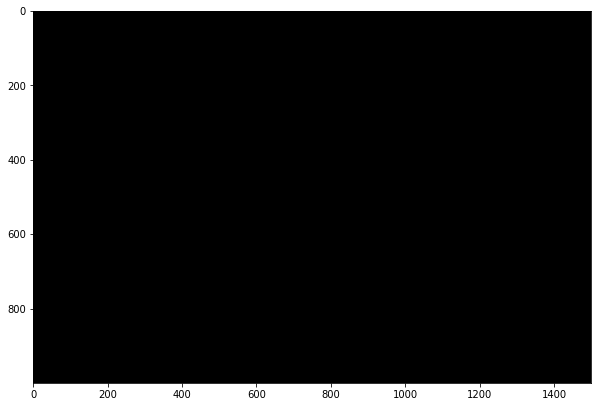

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))

In [13]:
# хорошие примеры для текущей версии (после добавления трёх точек и исправления регистрации столкновений с учетом расширения хитбокса при повороте)
# env v7
seeds_list = [1, 4, 5, 7 ,9, 10, 11, 14, 16, 17, 21, 24, 28, 29, 30, 32, 36, 38, 40, 43, 44, 45, 46, 49,
             53, 58, 59, 60, 62, 63, 64, 65, 66, 70, 72, 73, 76, 82, 84, 85, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100,
             103, 105, 107, 108, 109, 116,117, 119, 121,124, 127, 129, 131, 132, 138, 139, 140, 141, 146, 149, 150,
             152, 153, 154, 155, 156, 159, 160, 161, 166, 170, 172, 173, 174, 175, 176, 177, 179, 181, 182, 183, 185, 186,
             187, 189, 192, 194, 195, 196, 197, 198, 199]
# хорошие примеры для текущей версии (после добавления трёх точек и исправления регистрации столкновений с учетом расширения хитбокса при повороте)
# env v4
seeds_list = [7,12,13,14,16,17,18,20,27,30,32,35,47,48,49,50,
              52,58,64,65,73,74,75,76,77,78,80,81,82,85,86,88,90,93,94,95,96,97,98,99,
             101,103,104,105,109,112,113,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,132,135,138,141,143,144,145,147,149,150,
             152,153,154,155,157,159,160,161,162,163,166,168,170,172,175,176,179,182,183,188,192,194,195,196,197,198,199]
len(seeds_list)


100